# ***Customer Behavior - Un estudio para determinar la probabilidad de compra de los clientes***

El propósito de este proyecto es desarollar una red bayesiana que nos ayude a determinar la probabilidad de que un cliente realice una compra considerando  diversas variables que describiremos más adelante. El tema lo seleccionamos debido a que resulta interesante que los datos utilizados pueden obtenerse facilmente en cualquier negocio en línea mediante metadatos, además, es una aplicación útil que nos podría ayudar a personalizar descuentos, optimizar el diseño de la página web e incluso definir mejores estrategias de marketing para incrementar las ventas.

Los datos se obtuvieron de la plataformar [Kaggle](../../Downloads/consumer_behavior_dataset.csv), se hicieron diferentes busquedas y al final la base de datos elegida fue *"AI-Driven Consumer Behavior Dataset"*, la cual captura aspectos clave del comportamiento de compra en línea, incluyendo decisiones de compra, actividad de navegación, reseñas de clientes y detalles demográficos. Este conjunto está diseñado para investigaciones en análisis del comportamiento del consumidor, sistemas de recomendación basados en IA y optimización del marketing digital.

El data set contienel 5,000 muestras y 19 variables, las cuales se describen a continuación:
* User_id: Identificador único del usuario
* Product_id: Identificador único del producto
* Category: Tipo de producto
* Price: Precio del producto
* Discount_applied: Indica si el producto tenía algún descuento
* Payment_method: Método de pago (COD, tarjeta de crédito, tarjeta de débito, PayPal)
* Purchase_date: Fecha de la compra
* Pages_visited: Número de páginas visitadas por el cliente
* Time_spent: Tiempo total en la página
* Add_to_cart: Si agregó el artículo al carrito
* Abandoned_cart: Si eliminó el artículo del carrito
* Rating: Calificación del producto
* Review_text: Opiniones sobre el producto
* Sentiment_score: Nivel de satisfacción del cliente
* Age: Edad del usuario
* Gender: Género del usuario
* Income_level: Nivel de ingresos
* Location: Ciudad del cliente
* Purchase_decision: Indica si compró (1) o no el producto (0)



# **Análisis exploratorio de datos**

In [50]:
import pygraphviz as pgv
from IPython.display import display, SVG

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid") 

In [52]:
df = pd.read_csv('consumer_behavior_dataset.csv')
df

,user_id,product_id,category,price,discount_applied,payment_method,purchase_date,pages_visited,time_spent,add_to_cart,abandoned_cart,rating,review_text,sentiment_score,age,gender,income_level,location,purchase_decision
0,b93e568c-81fc-4db8-8509-2940e261b2f2,6badd48c-5349-444b-9f92-8a27c11ce05f,Clothing,389.23,46.99,Credit Card,2025-01-31 04:07:28,6,955,0,0,4,Start similar morning police quality various m...,0.16,51,Other,Low,Jeremyview,0
1,68c55d68-1074-48af-80ae-b5dad0915b8d,fe635f30-f9bb-4ca9-8a0d-3d6c67e2ae23,Clothing,344.81,9.11,COD,2025-01-21 06:07:28,8,790,1,0,3,Candidate level take evening almost push social.,0.03,54,Male,High,South Amy,1
2,a5adbe49-8208-459a-b72d-1b2960b38ade,e9dc8006-25eb-4aec-9c11-a2b33037b01b,Electronics,180.59,19.37,COD,2025-02-05 00:30:15,3,336,0,0,1,Way nearly value Republican part foot degree i...,0.10,49,Female,Low,West Lisaside,0
3,d0f1b4e1-d647-46d9-b88a-fea1beb8239f,8c7073db-ee68-415b-9686-ae6f068c9d2d,Grocery,415.26,25.18,Debit Card,2025-01-08 16:03:46,4,624,1,0,4,Drive eight upon do work share fear soldier no...,-0.50,20,Male,Low,Lake Deanport,1
4,2d530715-fb4f-40c5-95bb-02367d3c8c2c,864100c8-2502-4717-ba77-4261eae803f8,Electronics,352.82,46.07,PayPal,2025-02-27 19:53:59,4,579,0,0,5,Drug late look state concern personal go second.,-0.10,21,Other,Medium,Gloriaborough,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,a3d883b8-5b10-4791-9602-b98dc1836433,a5408a5e-0a96-4981-831f-86d233a4bee2,Grocery,312.12,15.59,Debit Card,2025-02-15 06:04:24,15,438,0,0,1,Side true site agreement industry rest ability...,0.17,44,Male,Low,Ralphburgh,0
4996,dde17596-28da-4d40-b917-a24a44d28c51,e523ec13-d39d-432b-bc83-8e1ca63a40f3,Books,269.24,20.98,PayPal,2025-01-10 11:26:12,2,974,1,1,1,New kid purpose save table inside myself.,0.14,20,Male,High,Shawnmouth,0
4997,d24ccc39-c3f8-453d-ba97-01b32979d87a,e3523e03-c254-428e-ad54-d9c815b639ca,Electronics,219.06,43.26,Credit Card,2025-02-05 14:28:03,10,961,1,1,4,Task evidence find project.,0.00,55,Female,Low,Jamesside,0
4998,27c5d04c-8646-4da0-848a-175c441415f9,b5ff3fc5-716e-446a-ba74-7238984563d4,Furniture,495.98,19.76,Debit Card,2025-02-13 19:54:42,14,168,1,1,1,Administration how moment drug health forget l...,0.21,58,Male,Low,Michelletown,0


Antes de empezar cualquier análisis revisamos si tenemos datos y si necesitamos eliminar alguna fila

In [53]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Total Faltantes': missing_values,
    'Porcentaje Faltante': missing_percentages
})
missing_df = missing_df[missing_df['Total Faltantes'] > 0].sort_values(by = 'Porcentaje Faltante', ascending = False)

missing_df

,Total Faltantes,Porcentaje Faltante


Debido a que no hay datos faltantes, pasamos a seleccionar las variables que necesitaremos para hacer el modelo. Primeramente eliminaremos las variables *user_id* , *product_id*, *purchase_date* , *review_text* y *location* ya que no aportan nada al modelo al ser variables tipo String.

También se eliminarán las variables *rating* y *sentiment_score* ya que el objetivo del estudio es ver patrones al momento de comprar y estas variables nos indican simplemente opiniones generales de los productos.

Lo que nos deja simplemente con 11 variables y nuestra variable objetivo *Purchase_decision*



In [54]:
df = df.drop(columns=['user_id', 'product_id', 'purchase_date', 'review_text', 'location', 'rating', 'sentiment_score'])
df.head()

,category,price,discount_applied,payment_method,pages_visited,time_spent,add_to_cart,abandoned_cart,age,gender,income_level,purchase_decision
0,Clothing,389.23,46.99,Credit Card,6,955,0,0,51,Other,Low,0
1,Clothing,344.81,9.11,COD,8,790,1,0,54,Male,High,1
2,Electronics,180.59,19.37,COD,3,336,0,0,49,Female,Low,0
3,Grocery,415.26,25.18,Debit Card,4,624,1,0,20,Male,Low,1
4,Electronics,352.82,46.07,PayPal,4,579,0,0,21,Other,Medium,0


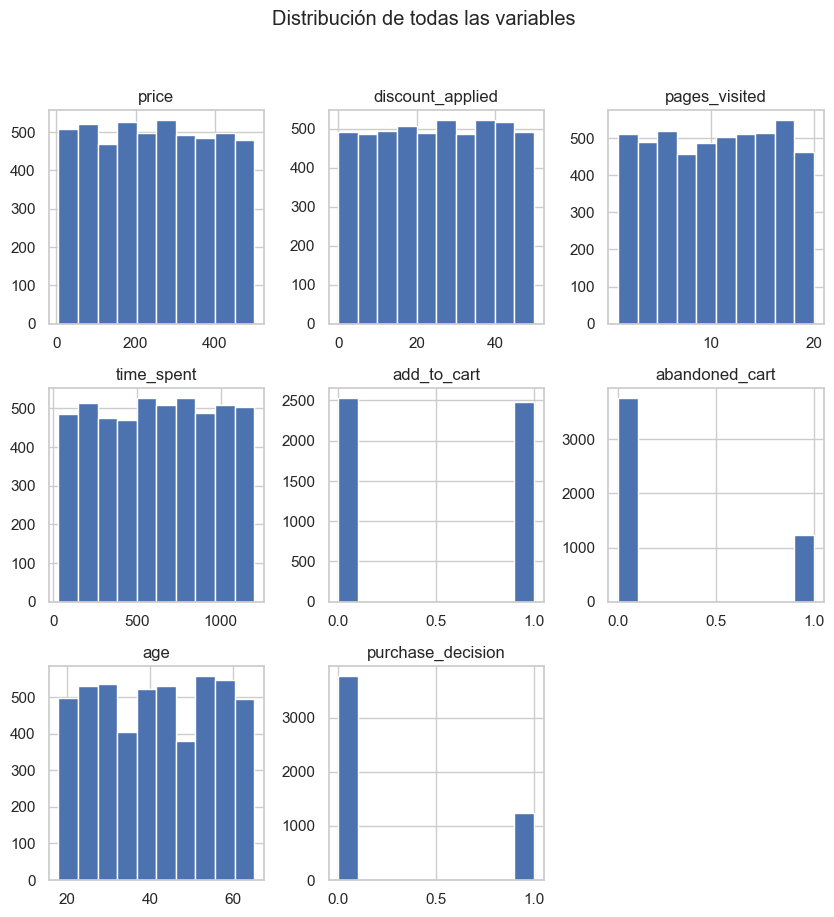

In [55]:
df.hist(figsize=(10, 10))
plt.suptitle('Distribución de todas las variables')
plt.show()

Dada las distribuciones de nuestras variables, nos damos cuenta que hay 5 variables numericas continuas, las cuales tendremos que discretizar y 3 variables discretas. También tendremos que categorizar las variables: *Category*, *Payment_method*, *gender* e *income_level*

En términos generales, nuestros datos presentan una distribución relativamente uniforme. Sin embargo, la variable objetivo muestra un desbalance significativo, lo que podría afectar el rendimiento del modelo durante el entrenamiento.


Antes de diseñar nuestra red bayesiana, continuaremos con el análisis exploratorio. Para ello, generaremos variables dummy que nos permitan construir un diagrama de correlación. Este análisis será útil para identificar relaciones entre variables, detectar posibles redundancias y resaltar características relevantes.

In [56]:
dummies_gender = pd.get_dummies(df['gender'], prefix='Genero')
dummies_category = pd.get_dummies(df['category'], prefix='Categoria')
dummies_payment = pd.get_dummies(df['payment_method'], prefix='Metodo_Pago')
dummies_income = pd.get_dummies(df['income_level'], prefix='Nivel_Ingreso')

correlation_df = pd.concat([df.drop(columns=['gender', 'category', 'payment_method', 'income_level']),
                            dummies_gender, dummies_category, dummies_payment, dummies_income], axis=1)


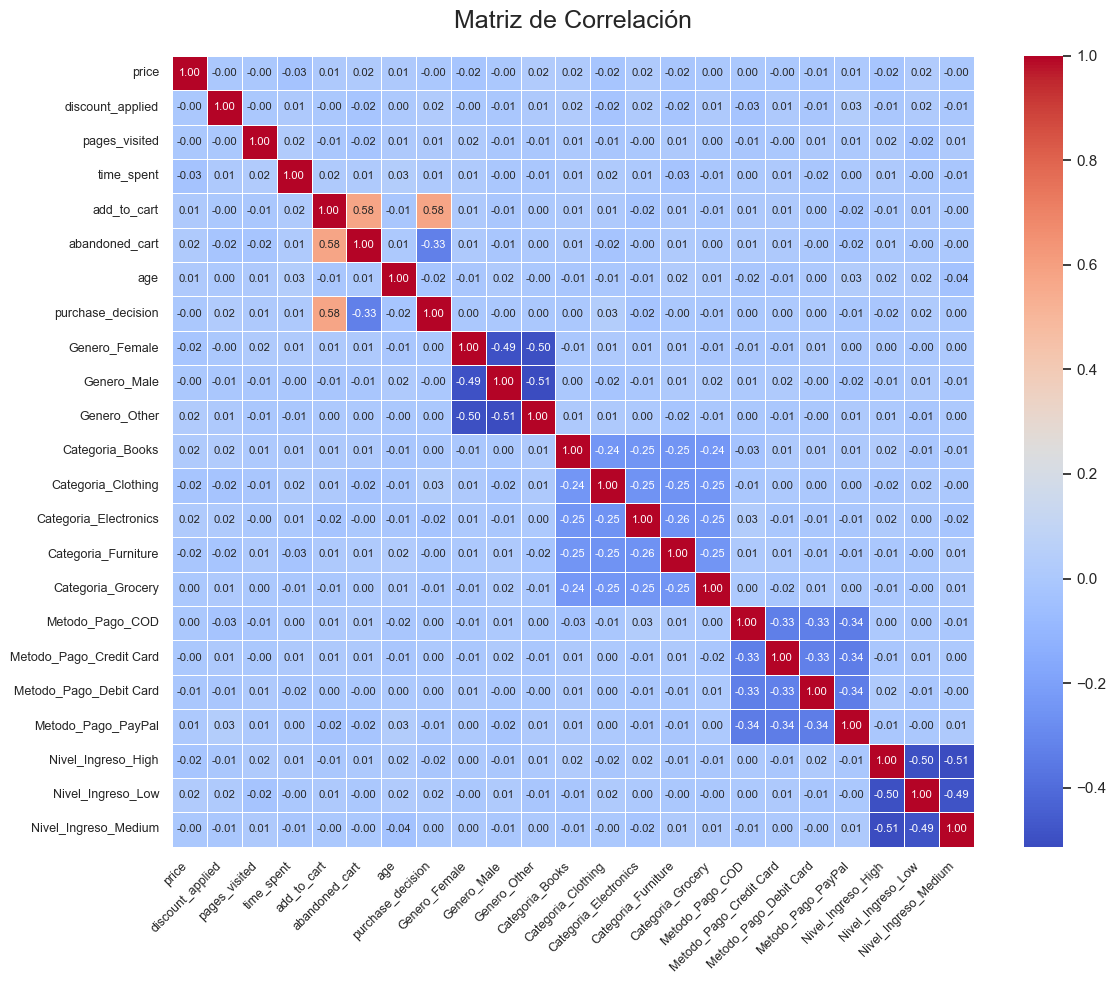

In [57]:
matriz_corr = correlation_df.corr(numeric_only=True)

# Crear figura más grande para mejor visualización
sns.set_theme(style="white")
plt.figure(figsize=(12, 10))

# Heatmap con ajustes
sns.heatmap(matriz_corr,
            annot=True,           # Mostrar valores
            cmap='coolwarm',      # Colores
            fmt=".2f",            # Formato de números
            linewidths=.5,
            annot_kws={"size": 8}) # Tamaño de los números

# Ajustar título y etiquetas
plt.title('Matriz de Correlación', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Ajustar layout para que no se corte nada
plt.tight_layout()
plt.show()

De manera general no se ve ninguna correlación tan fuerte más que que la de *abandoned_cart* y *add_to_cart*, no es una correlación tan alta pero debido a que para poder comprar es necesario meter al carrito, se decide quitar esta variable para que no meta mucho ruido en el modelo. Lo cuál nos deja con 10 variables y nuestra variable objetivo

In [58]:
df = df.drop(columns=['abandoned_cart'])
df.head()

,category,price,discount_applied,payment_method,pages_visited,time_spent,add_to_cart,age,gender,income_level,purchase_decision
0,Clothing,389.23,46.99,Credit Card,6,955,0,51,Other,Low,0
1,Clothing,344.81,9.11,COD,8,790,1,54,Male,High,1
2,Electronics,180.59,19.37,COD,3,336,0,49,Female,Low,0
3,Grocery,415.26,25.18,Debit Card,4,624,1,20,Male,Low,1
4,Electronics,352.82,46.07,PayPal,4,579,0,21,Other,Medium,0


Seguiendo con nuestro análisis exploratorio de los datos, procedemos a hacer diagramas de cajas para verificar si hay datos atípicos en nuestras variables numéricas

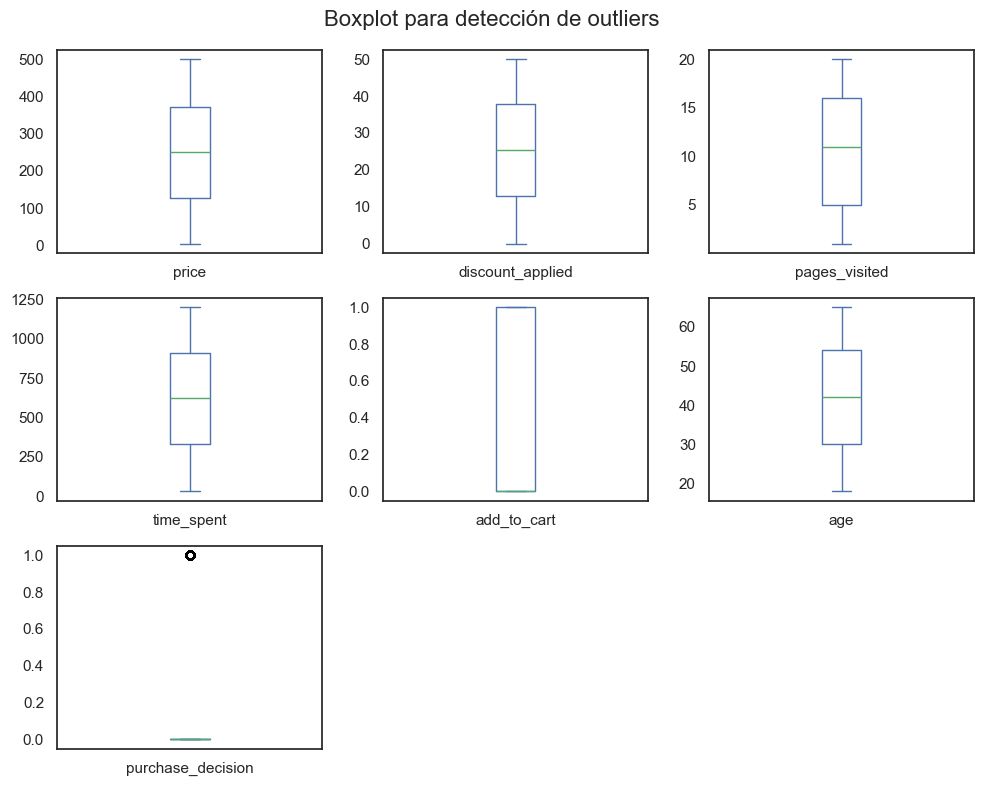

In [59]:
df.select_dtypes(include='number').plot(
    kind='box', subplots=True,
    layout=(3,3), figsize=(10,8),
    sharex=False, sharey=False
)

plt.suptitle('Boxplot para detección de outliers', fontsize=16)
plt.tight_layout()
plt.show()

En general no se ven datos atípicos en las variables continuas, pero con los diagramas también confirmamos que nuestra base de datos esta desbalanceada

Ahora procedemos con crear las etiquetas para nuestros datos tipo string

In [60]:
df['gender'], uniques = pd.factorize(df['gender'])
df['category'], uniques = pd.factorize(df['category'])
df['payment_method'], uniques = pd.factorize(df['payment_method'])
df['income_level'], uniques = pd.factorize(df['income_level'])

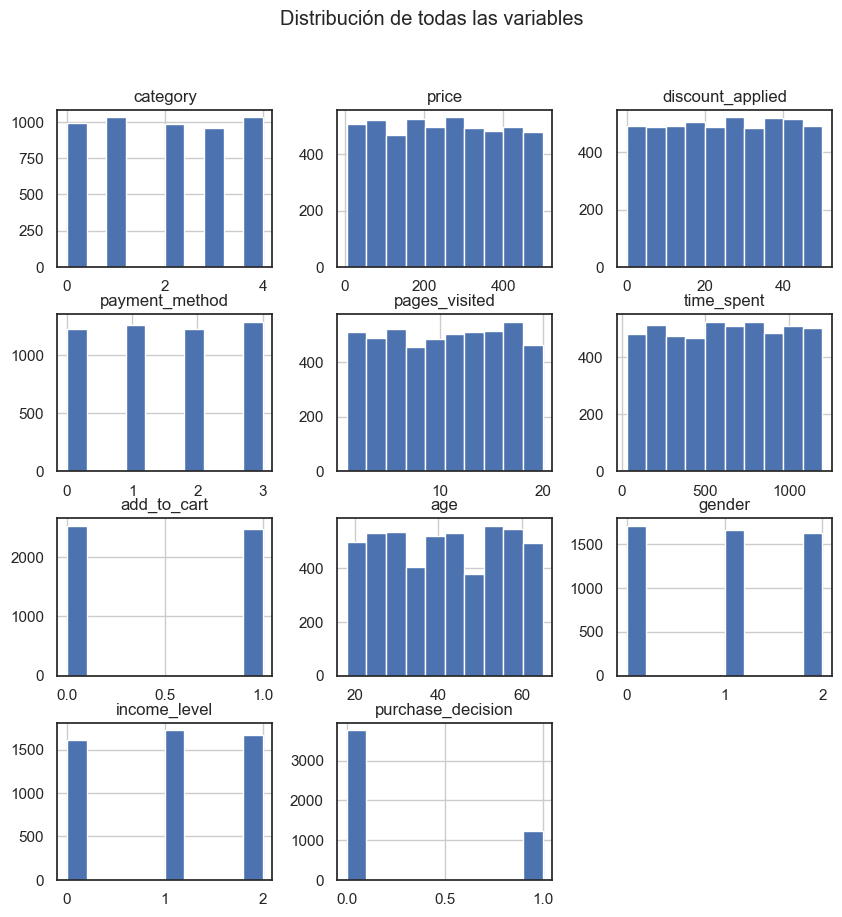

In [61]:
df.hist(figsize=(10, 10))
plt.suptitle('Distribución de todas las variables')
plt.show()

En general, nuestras variables categoricas se muestran balanceadas.

El siguiente paso es realizar nuestra discretización de las variables continuas:

* Price: esta variable la dividiremos en tres categorías:
    * 0: Precio bajo
    * 1: Precio medio
    * 2: Precio alto
* Discount applied: debido a que esta variable toma en cuenta descuentos muy pequeños, la dividiremos en 3 categirías:
    * 0 – Descuento medio
    * 1 – Desciento medio
    * 2 – Descuento alto
* Pages visited: Se dividirá en cuatro categorías para capturar mayor variabilidad
* Time spend: Se dividirá en cinco categorías, considerando que los datos son muy extremos (rango: 0 a 1200 minutos)
* Age: lo dividiremos en cuatro categorías de acuerdo a las diferentes generaciones marcadas por estudios de marketing
    * 0 – Generación Z (15–27 años)
    * 1 – Generación Y (28–43 años)
    * 2 – Generación X (44–59 años)
    * 3 – Baby Boomers (60 años en adelante)

In [62]:
df['price'] = pd.qcut(df['price'], q=3, labels=range(0, 3))
df['discount_applied'] = pd.qcut(df['discount_applied'], q=7, labels=range(0, 7))
df['pages_visited'] = pd.qcut(df['pages_visited'], q=8, labels=range(0, 8))
df['time_spent'] = pd.qcut(df['time_spent'], q=5, labels=range(0, 5))

In [63]:

bins = [14, 27, 43, 59, 120]
labels = [1, 2, 3, 4]

df['age'] = pd.cut(df['age'], bins=bins, labels=labels)


In [64]:
df['price'].value_counts().sort_index()

price
0    1667
1    1666
2    1667
Name: count, dtype: int64

In [65]:
df['discount_applied'].value_counts().sort_index()

discount_applied
0    715
1    714
2    714
3    714
4    715
5    713
6    715
Name: count, dtype: int64

In [66]:
df['pages_visited'].value_counts().sort_index()

pages_visited
0    738
1    519
2    719
3    729
4    526
5    756
6    549
7    464
Name: count, dtype: int64

In [67]:
df['time_spent'].value_counts().sort_index()

time_spent
0    1002
1     998
2    1001
3    1002
4     997
Name: count, dtype: int64

In [68]:
df['age'].value_counts().sort_index()

age
1    1029
2    1678
3    1681
4     612
Name: count, dtype: int64

In [69]:
df = df.astype(int)
print(df.dtypes)

category             int64
price                int64
discount_applied     int64
payment_method       int64
pages_visited        int64
time_spent           int64
add_to_cart          int64
age                  int64
gender               int64
income_level         int64
purchase_decision    int64
dtype: object


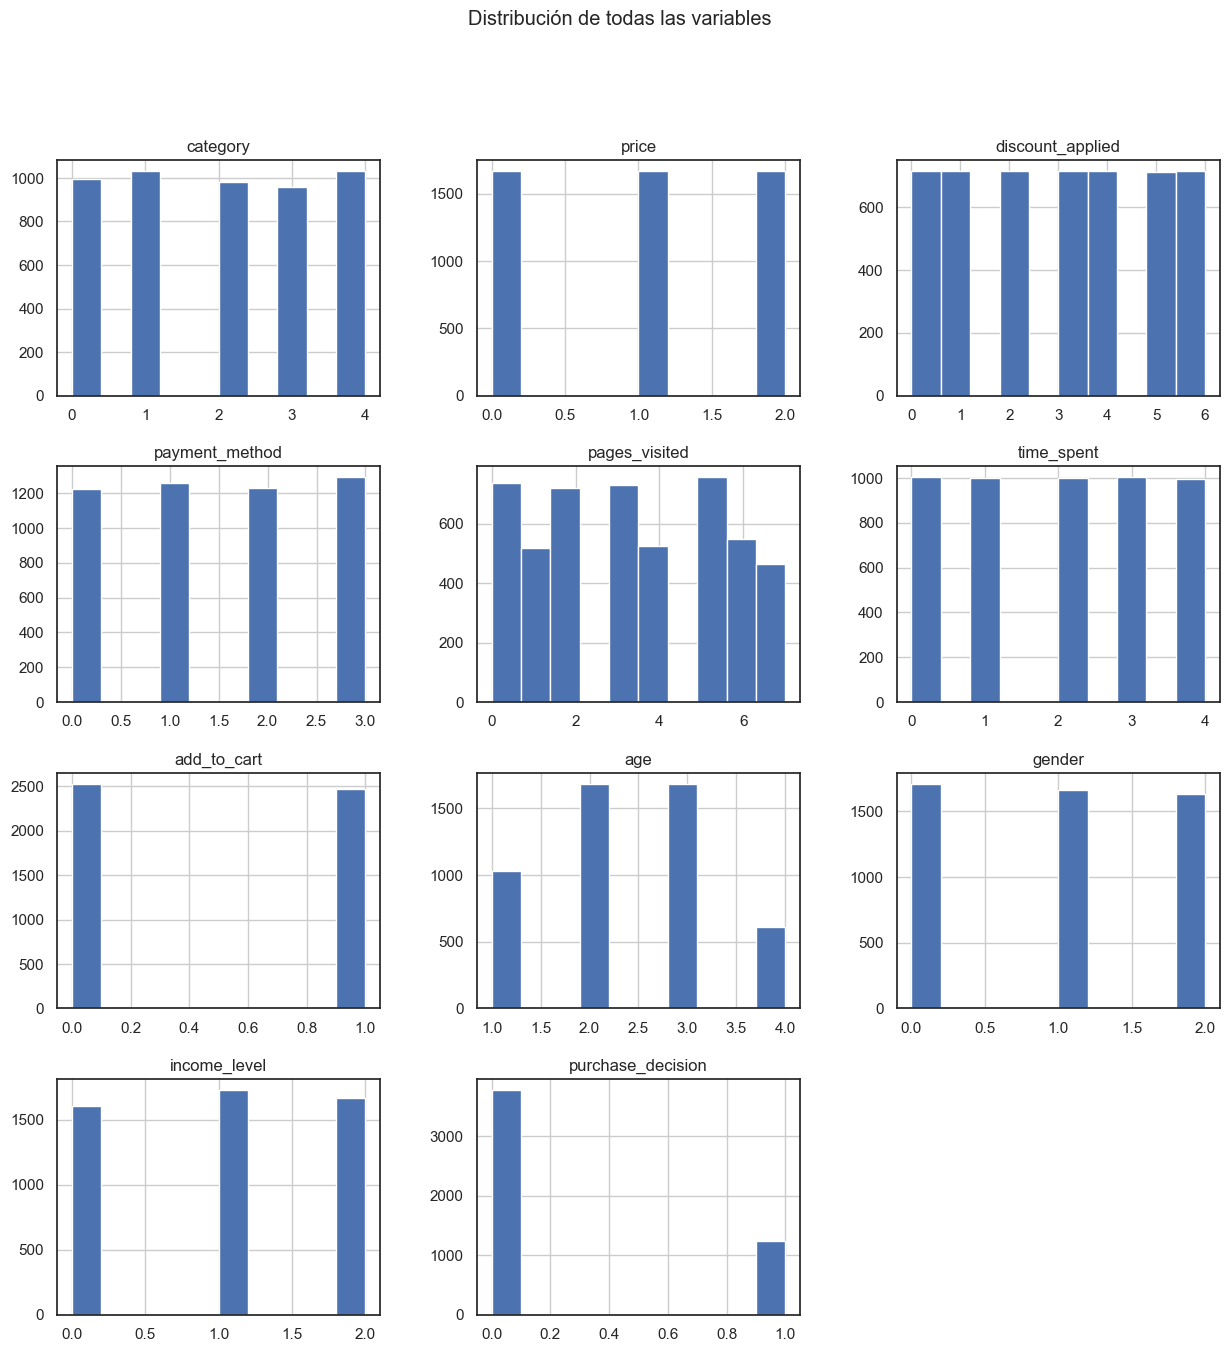

In [70]:
df.hist(figsize=(15, 15))
plt.suptitle('Distribución de todas las variables')
plt.show()

# **Propuesta de solución y modelamiento**

**Red Bayesiana**

A continuación, encontraremos un modelo propuesto con ayuda de mercadologos especialistas en estudios de mercado.
La estructura busca representar la relación entre los factores más importantes para que un consumidor decida o no comprar un producto.

1. Influencia de precios y descuentos:
  
  En el grafo se logra representar que el precio de un producto se determina gracias a los descuentos que tiene y a la categoría a la que pertenece, porque por ejemplo, los productos electronicos y muebles suelen ser más caros que los demás. Además si un producto tiene un buen precio, descuento y aparte se considera como un articulo de alto valor, es muy probable que se agregue al carrito de compra y se proceda a la compra.

  2. Categoría del producto y comportamiento del usuario

  El consumidor suele dedicar más tiempo y cuidado en su decisión si desea comprar algo dependiendo el tipo de categoría, no es lo mismo cuando un cliente va a decidir comprar un sillon, que normalmente son más caros y existen muchas variedades, a comprar un libro. Y normalmente se busca encontrar los precios más competitivos. También, el hecho de que el usuario decida buscar muchas opciones, significa que realmente el interes en comprar el producto es alto, por lo tanto aumentaría la probabilidad de compra.

  3. Caraterísticas demográficas:

  La edad y el genero son dos variables que reflejan patrones de navegación, ya que una persona más joven suele buscar más opciones y comparar, además le resulta más fácil y cómodo hacerlo en la web. A comparación de una persona adulta, que se le puede llegar a dificultar hacer compras en linea, buscar y comparar. Además la brecha generacional refleja ampliamente la cantidad de ingresos que puede tener una persona y el acceso que tenga a tarjetas bancarias para diversificar sus métodos de pago.

  4. Secuencia lógica de compra:

  Normalmente, si una persona agrega un producto a su carro de compra es porque va a comprar, reflejando el flujo típico: interacción -> carrito -> pago -> compra


  **Medición del modelo**

  Para verificar el rendimiento de nuestro modelo usaremos dos métricas
  * Accuracy: ya que nos interesa saber el desempeño global del modelo, por lo tanto tenemos que medir la cantidad todad de Verdaderos en nuestro modelo, dando la misma importancia a si compro o no compro.
  * F1: Debido a que notamos que nuestras clases estan desbalanceadas, queremos ver el equilibrio entre nuestros falsos positivos y verdaderos positivos.

In [71]:
target = "purchase_decision"
features = df.columns.tolist()
features.remove(target)

print("Features:", features)
print("Target:", target)

Features: ['category', 'price', 'discount_applied', 'payment_method', 'pages_visited', 'time_spent', 'add_to_cart', 'age', 'gender', 'income_level']
Target: purchase_decision


In [72]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [73]:
train_data = pd.concat([X_train, y_train], axis=1)

In [74]:
aristas_1 = [
    ('discount_applied','price'),
    ('discount_applied','purchase_decision'),
    ('category','discount_applied'),
    ('category','price'),
    ('price','purchase_decision'),
    ('gender','pages_visited'),
    ('gender','time_spent'),
    ('add_to_cart','purchase_decision'),
    ('pages_visited','add_to_cart'),
    ('time_spent','add_to_cart'),
    ('age','add_to_cart'),
    ('price','add_to_cart'),
    ('pages_visited','time_spent'),
    ('pages_visited','purchase_decision'),
    ('time_spent','purchase_decision'),
    ('gender','payment_method'),
    ('payment_method','purchase_decision'),
    ('age','time_spent'),
    ('age','pages_visited'),
    ('gender','income_level'),
    ('income_level','purchase_decision'),
    ('income_level','payment_method'),
    ('add_to_cart','payment_method')
]

modelo = DiscreteBayesianNetwork(aristas_1)


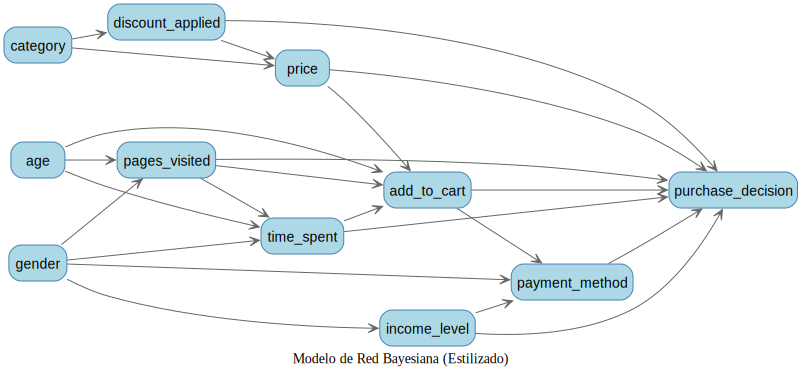

In [75]:
G = pgv.AGraph(directed=True, strict=False)
G.add_edges_from(aristas_1) 

G.graph_attr['label'] = 'Modelo de Red Bayesiana (Estilizado)'
G.graph_attr['rankdir'] = 'LR' 

G.node_attr['shape'] = 'box'
G.node_attr['style'] = 'filled,rounded'
G.node_attr['fillcolor'] = '#ADD8E6'
G.node_attr['color'] = '#4682B4'
G.node_attr['fontname'] = 'Helvetica'

G.edge_attr['color'] = 'gray40'
G.edge_attr['arrowhead'] = 'vee'

G.layout(prog='dot') 

svg_bytes = G.draw(format='svg')
svg_string = svg_bytes.decode(G.encoding)
display(SVG(svg_string))

In [76]:
modelo.fit(train_data)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'category': 'N', 'price': 'N', 'discount_applied': 'N', 'payment_method': 'N', 'pages_visited': 'N', 'time_spent': 'N', 'add_to_cart': 'N', 'age': 'N', 'gender': 'N', 'income_level': 'N', 'purchase_decision': 'N'}


In [77]:
modelo.check_model()

True

In [78]:
for cpd in modelo.get_cpds():
    print(cpd)
    print("#-----------------------------#")

+---------------------+-----+---------------------+
| category            | ... | category(4)         |
+---------------------+-----+---------------------+
| discount_applied(0) | ... | 0.1543942992874109  |
+---------------------+-----+---------------------+
| discount_applied(1) | ... | 0.14133016627078385 |
+---------------------+-----+---------------------+
| discount_applied(2) | ... | 0.13539192399049882 |
+---------------------+-----+---------------------+
| discount_applied(3) | ... | 0.14726840855106887 |
+---------------------+-----+---------------------+
| discount_applied(4) | ... | 0.14133016627078385 |
+---------------------+-----+---------------------+
| discount_applied(5) | ... | 0.15558194774346792 |
+---------------------+-----+---------------------+
| discount_applied(6) | ... | 0.12470308788598575 |
+---------------------+-----+---------------------+
#-----------------------------#
+------------------+-----+---------------------+
| category         | ... | category

In [79]:
predicciones = modelo.predict(X_test)
y_pred = predicciones[target]

100%|██████████| 1000/1000 [00:05<00:00, 175.43it/s]


In [80]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7410
F1-score: 0.6667


**Naive Bayes**

In [81]:
aristas_2 = [
    ('purchase_decision', 'category'),
    ('purchase_decision', 'price'),
    ('purchase_decision', 'discount_applied'),
    ('purchase_decision', 'payment_method'),
    ('purchase_decision', 'pages_visited'),
    ('purchase_decision', 'time_spent'),
    ('purchase_decision', 'add_to_cart'),
    ('purchase_decision', 'age'),
    ('purchase_decision', 'gender'),
    ('purchase_decision', 'income_level')
]

modelo_2 = DiscreteBayesianNetwork(aristas_2)

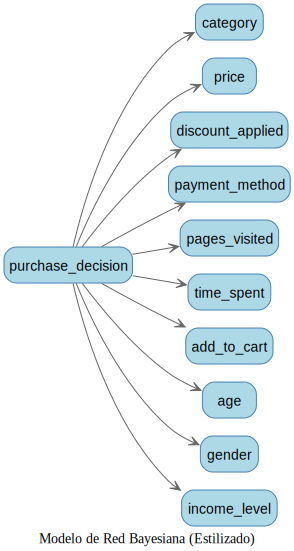

In [82]:
G_2 = pgv.AGraph(directed=True, strict=False)
G_2.add_edges_from(aristas_2) 

G_2.graph_attr['label'] = 'Modelo de Red Bayesiana (Estilizado)'
G_2.graph_attr['rankdir'] = 'LR' 

G_2.node_attr['shape'] = 'box'
G_2.node_attr['style'] = 'filled,rounded'
G_2.node_attr['fillcolor'] = '#ADD8E6'
G_2.node_attr['color'] = '#4682B4'
G_2.node_attr['fontname'] = 'Helvetica'

G_2.edge_attr['color'] = 'gray40'
G_2.edge_attr['arrowhead'] = 'vee'

G_2.layout(prog='dot') 

svg_bytes = G_2.draw(format='svg')
svg_string = svg_bytes.decode(G.encoding)
display(SVG(svg_string))

In [83]:
modelo_2.fit(train_data)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'category': 'N', 'price': 'N', 'discount_applied': 'N', 'payment_method': 'N', 'pages_visited': 'N', 'time_spent': 'N', 'add_to_cart': 'N', 'age': 'N', 'gender': 'N', 'income_level': 'N', 'purchase_decision': 'N'}


In [84]:
modelo_2.check_model()

True

In [85]:
print(modelo_2.get_cpds(target))

+----------------------+---------+
| purchase_decision(0) | 0.75025 |
+----------------------+---------+
| purchase_decision(1) | 0.24975 |
+----------------------+---------+


In [86]:
for cpd in modelo_2.get_cpds():
    print(cpd)
    print("#-----------------------------#")

+----------------------+---------+
| purchase_decision(0) | 0.75025 |
+----------------------+---------+
| purchase_decision(1) | 0.24975 |
+----------------------+---------+
#-----------------------------#
+-------------------+----------------------+----------------------+
| purchase_decision | purchase_decision(0) | purchase_decision(1) |
+-------------------+----------------------+----------------------+
| category(0)       | 0.19893368877040987  | 0.22322322322322322  |
+-------------------+----------------------+----------------------+
| category(1)       | 0.2089303565478174   | 0.18218218218218218  |
+-------------------+----------------------+----------------------+
| category(2)       | 0.19260246584471843  | 0.19019019019019018  |
+-------------------+----------------------+----------------------+
| category(3)       | 0.18927024325224925  | 0.1931931931931932   |
+-------------------+----------------------+----------------------+
| category(4)       | 0.21026324558480505  | 

In [87]:
predicciones = modelo_2.predict(X_test)
y_pred = predicciones[target]

100%|██████████| 1000/1000 [00:00<00:00, 5373.94it/s]


In [88]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6380
F1-score: 0.6385


**BayesianEstimator**

In [89]:
estimator = BayesianEstimator(
    model=modelo,
    data=train_data
)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'category': 'N', 'price': 'N', 'discount_applied': 'N', 'payment_method': 'N', 'pages_visited': 'N', 'time_spent': 'N', 'add_to_cart': 'N', 'age': 'N', 'gender': 'N', 'income_level': 'N', 'purchase_decision': 'N'}


In [90]:

num_parent_configs = np.prod([train_data[parent].nunique() for parent in modelo.get_parents(target)])
pseudo_counts = np.tile(np.array([[3], [1]]), (1, num_parent_configs))

pseudo_counts.shape


(2, 20160)

In [91]:
cpd_purchase = estimator.estimate_cpd(
    node=target,
    prior_type="dirichlet",
    pseudo_counts=pseudo_counts
)

In [92]:
print(cpd_purchase)

+----------------------+-----+---------------------+
| add_to_cart          | ... | add_to_cart(1)      |
+----------------------+-----+---------------------+
| discount_applied     | ... | discount_applied(6) |
+----------------------+-----+---------------------+
| income_level         | ... | income_level(2)     |
+----------------------+-----+---------------------+
| pages_visited        | ... | pages_visited(7)    |
+----------------------+-----+---------------------+
| payment_method       | ... | payment_method(3)   |
+----------------------+-----+---------------------+
| price                | ... | price(2)            |
+----------------------+-----+---------------------+
| time_spent           | ... | time_spent(4)       |
+----------------------+-----+---------------------+
| purchase_decision(0) | ... | 0.75                |
+----------------------+-----+---------------------+
| purchase_decision(1) | ... | 0.25                |
+----------------------+-----+----------------

In [93]:
modelo.add_cpds(cpd_purchase)

In [94]:
modelo.check_model()

True

In [95]:
predicciones = modelo.predict(X_test)
y_pred = predicciones[target]

100%|██████████| 1000/1000 [00:01<00:00, 925.52it/s]


In [96]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7650
F1-score: 0.6631


**Regresión Logística**

Solo por curiosidad realizamos una regresión logistica para comprar los modelos y ver la diferencia de hacerlo con probabilidades con ayuda de Bayes y un modelo típico de machine learning

In [97]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')

print(f"Accuracy: {accuracy_log:.4f}")
print(f"F1-score: {f1_log:.4f}")


Accuracy: 0.7330
F1-score: 0.7385


### Query

CASO DE USO:
Vamos a preguntar por la variable 'purchase_decision'
Evidencia (lo que sabemos):
- add_to_cart = 1 (Sí lo agregó)
- category = 2 (Electronics)
- income_level = 2 (Nivel de ingreso alto)
- time_spent = 4 (Pasó mucho tiempo, cuartil alto)

In [ ]:
from pgmpy.inference import VariableElimination

inferencia = VariableElimination(modelo)

print("--- Realizando Inferencia en el Modelo 1 ---")

evidencia = {
    'add_to_cart': 1,
    'category': 2,
    'income_level': 2,
    'time_spent': 4
}

# Realizamos la consulta
resultado_query = inferencia.query(variables=['purchase_decision'], evidence=evidencia)

print(f"\nEvidencia proporcionada: {evidencia}")
print("\nProbabilidad de Decisión de Compra (0 = No, 1 = Sí):")
print(resultado_query)

# Para obtener el valor exacto de la probabilidad de Sí (1):
prob_si = resultado_query.values[1]
print(f"\nLa probabilidad calculada de compra para este perfil es: {prob_si:.2%}")

--- Realizando Inferencia en el Modelo 1 ---

Evidencia proporcionada: {'add_to_cart': 1, 'category': 2, 'income_level': 2, 'time_spent': 4}

Probabilidad de Decisión de Compra (0 = No, 1 = Sí):
+----------------------+--------------------------+
| purchase_decision    |   phi(purchase_decision) |
+======================+==========================+
| purchase_decision(0) |                   0.7393 |
+----------------------+--------------------------+
| purchase_decision(1) |                   0.2607 |
+----------------------+--------------------------+

La probabilidad calculada de compra para este perfil es: 26.07%


# **Conclusiones**

Después de construir, entrenar y evaluar los modelos probabilísticos para predecir la compra (`purchase_decision`), estos son los puntos más importantes que se obtuvieron del análisis.

---

### Preparación de los datos

Para que el modelo pudiera aprender correctamente, primero se hicieron algunos ajustes clave:

- **Se limpiaron variables que no aportaban valor** para la predicción o que podían dar ventajas irreales al modelo (como `rating` o análisis de sentimiento, que al haberlas usado se hubiera dado una impresión de "trampa" al entrenar nuestros modelos).
- **Las variables numéricas se pasaron a categorías** usando cuantiles (`qcut`) en columnas como `price` y `time_spent`, lo que ayudó a que los estados quedaran mejor distribuidos y el modelo no se “atorara” con casos poco comunes.
- Sin esta parte, la red tendría problemas con combinaciones raras y daría probabilidades en cero, lo cual no sirve para hacer predicciones realistas.

En resumen: esta etapa fue necesaria para que el modelo funcionara bien con datos nuevos y no solo con los que ya había visto.

---

### Prueba de inferencia (simulación de un cliente ideal)

Se hizo una consulta al **Modelo 1**, imaginando a un usuario con el siguiente perfil:

- Tiene **ingresos altos**
- Está viendo productos de **Electrónica**
- Pasa **mucho tiempo en el sitio**
- Y agregó el producto al carrito (`add_to_cart = 1`)

**Resultado:**

> Probabilidad de compra = **26.07%**

**Lo que significa esto en la práctica:**

- Sí es una probabilidad más baja de lo que esperaríamos si solo viéramos que el producto está en el carrito, **pero sí coincide con la realidad del negocio**.
- El modelo entendió que muchas personas agregan cosas al carrito y **no terminan pagando**.
- Entonces, no es que el modelo “se equivoque”, sino que aprendió un patrón real: **interés no siempre es compra**.

---

### Comparación contra un modelo simple y un baseline

| Modelo     | Tipo de estructura | Cómo aprendió | Accuracy | F1-Score |
|------------|------------------|--------------|----------|----------|
| Modelo 2   | Naive Bayes     | Máxima verosimilitud | 0.6380 | 0.6385 |
| Modelo 1   | Red Bayesiana causal (DAG) | Estimador bayesiano con Dirichlet | **0.7650** | **0.6631** |
| Baseline   | Regresión logística | Modelo de referencia | 0.7330 | 0.7385 |

**Notas generales:**

- La red DAG fue la que **mejor entendió la relación entre las variables**.
- El Naive Bayes quedó corto porque **parte de un supuesto que no se cumple** en estos datos: que todas las variables son independientes entre sí.
- La regresión logística tuvo buen desempeño, pero **no explica el proceso como lo hace la red**.

---

### Lo más relevante que aprendimos

1. **Las variables están conectadas entre sí**  
   Por ejemplo: el tiempo que alguien pasa en el sitio y cuántas páginas visita, influyen directamente en que agregue cosas al carrito… y eso, a su vez, afecta la compra. El modelo DAG sí pudo captarlo. El Naive no.

2. **El suavizado con Dirichlet hizo la diferencia**  
   Gracias a eso, el modelo pudo dar probabilidades útiles incluso en casos que casi no salen en los datos de entrenamiento. Sin Dirichlet, muchos escenarios darían ceros, lo que no sirve en producción.

3. **El modelo es útil para tomar decisiones de negocio**  
   Porque deja ver la lógica que aprendió. El flujo que mejor resume lo que pasa en las compras es:

Perfil del usuario → Cómo navega → Si se interesa (carrito) → Compra


---

### Conclusión principal

- El **Modelo 1 (DAG)** fue el más adecuado para este problema porque:
- Aprende relaciones del mundo real (no falsas independencias)
- Funciona mejor cuando llegan datos diferentes a los de entrenamiento
- Y permite explicar **por qué** se llegó a una probabilidad y no solo dar un número

Esto también sugierir 2 cosas

Algo práctico: **si se quiere vender más, hay que lograr que las personas se queden y naveguen más antes de llegar al carrito**, porque ese es el punto donde nace el interés real.

Algo lógico: **si se quiere vender más, hay que incentivar la interacción temprana en el sitio para maximizar la probabilidad final de conversión.**
